#1. 데이터 import

In [ ]:
from sklearn.datasets import fetch_openml

# fetch_openml을 사용하여 타이타닉 데이터셋을 불러옵니다.
titanic = fetch_openml('titanic', version=1, as_frame=True)

# 데이터 프레임으로 변환
titanic_data = titanic.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#2.데이터 확인

In [ ]:
# 데이터의 처음 5행을 출력하여 데이터를 살펴봅니다.
print(titanic_data.head())

   pclass survived                                             name     sex  \
0     1.0        1                    Allen, Miss. Elisabeth Walton  female   
1     1.0        1                   Allison, Master. Hudson Trevor    male   
2     1.0        0                     Allison, Miss. Helen Loraine  female   
3     1.0        0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S     2   None   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St 

In [ ]:
# 데이터셋의 통계적 요약을 출력합니다.
print(titanic_data.describe())

            pclass          age        sibsp        parch         fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881135     0.498854     0.385027    33.295479
std       0.837836    14.413500     1.041658     0.865560    51.758668
min       1.000000     0.166700     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200


In [ ]:
# 데이터셋의 통계적 요약을 출력합니다.
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB
None


In [ ]:
# 결측치가 있는지 확인합니다.
print(titanic_data.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


#3. 데이터 전처리

In [ ]:
import pandas as pd

# 예시: 나이 결측치 처리, 성별 인코딩, 불필요한 특성 제거

# 1. 250개가 결측치 -> 만약에 이 데이터를 다 제거했을경우 1300개 20% 데이터 손실! -> 모델성능도 떨어질수 있다.
# 2. 250개를 살렸을때 -> 값을 모르는 상태 대체했을때 -> 1300개 다 쓸수있으니까 데이터는 확보 -> 신빙성이 떨어질수 있다.
    # -> 준지도학습 다른 데이터에 기반해서 추정!

#추가 : 새로운 변수는 없을까?

titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True) # ['age']변수의 평균값으로 null값을 채워라 / 기존 데이터에 업데이트 해라)

titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

titanic_data = titanic_data.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [ ]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1308 non-null   float64 
dtypes: category(2), float64(5)
memory usage: 54.1 KB
None


In [ ]:
print(titanic_data)

      pclass survived sex        age  sibsp  parch      fare
0        1.0        1   1  29.000000    0.0    0.0  211.3375
1        1.0        1   0   0.916700    1.0    2.0  151.5500
2        1.0        0   1   2.000000    1.0    2.0  151.5500
3        1.0        0   0  30.000000    1.0    2.0  151.5500
4        1.0        0   1  25.000000    1.0    2.0  151.5500
...      ...      ...  ..        ...    ...    ...       ...
1304     3.0        0   1  14.500000    1.0    0.0   14.4542
1305     3.0        0   1  29.881135    1.0    0.0   14.4542
1306     3.0        0   0  26.500000    0.0    0.0    7.2250
1307     3.0        0   0  27.000000    0.0    0.0    7.2250
1308     3.0        0   0  29.000000    0.0    0.0    7.8750

[1309 rows x 7 columns]


In [ ]:
titanic_data['fare'].fillna(titanic_data['fare'].mean(), inplace=True) # ['age']변수의 평균값으로 null값을 채워라 / 기존 데이터에 업데이트 해라)

In [ ]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1309 non-null   float64 
dtypes: category(2), float64(5)
memory usage: 54.1 KB
None


#4. 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

# 입력 변수와 타겟 변수 분리
X = titanic_data.drop(['survived'], axis=1) # 'survived' 컬럼 제외  (x에는 타겟이 있으면 안됨)
y = titanic_data['survived'] # 타겟 변수  (y에만 정답이 있어야한다.)

# 데이터 분할: 훈련 세트 80%, 테스트 세트 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31) # 고정된 값으로 분할이 가능

In [ ]:
X_test

,pclass,sex,age,sibsp,parch,fare
1074,3.0,0,29.881135,0.0,0.0,7.7500
703,3.0,0,21.000000,0.0,0.0,7.7500
222,1.0,0,28.500000,0.0,0.0,27.7208
1295,3.0,0,21.000000,0.0,0.0,7.2500
557,2.0,1,25.000000,0.0,1.0,26.0000
...,...,...,...,...,...,...
997,3.0,1,29.881135,0.0,0.0,7.2250
170,1.0,0,49.000000,0.0,0.0,0.0000
1159,3.0,1,29.881135,0.0,0.0,8.0500
966,3.0,1,25.000000,0.0,0.0,7.7750


#5. 알고리즘 선택! - 베이스라인 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 인스턴스 생성 준비!
model = RandomForestClassifier(random_state=31)

#6.학습

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=31)

#7.예측

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array(['0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0

#8.평가

* 실제값과 예측된값이 실제로 일치하는지를 점검! -> 정확도
* 생존여부(1/0) -> 분류 -> 이진 분류 -> 맞는지 틀리는지 정확도!

In [ ]:
# 테스트 데이터를 가지고 predict(예측)한다.
predictions = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, predictions) #실제값과 예측값을 비교해줘
print(f"Accuracy: {accuracy}") # 두 데이터가 얼마나 일치하는지 점검

Accuracy: 0.9703915950334289


In [ ]:
# 학습 97% / 평가 78% -> 내신 상위 3% / 수능 22%
# 과적합 -> 학습된 데이터만 잘 맞추는것! / 그외의 데이터는 잘 맞추지 못한다.!
# 보통 학습과 평가간의 10% 이상 오차가 나

In [ ]:
# 약 200개정도 정답을 맞췄어 60개 정도는 틀렸어!

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions) #실제값과 예측값을 비교해줘
print(f"Accuracy: {accuracy}") # 두 데이터가 얼마나 일치하는지 점검

Accuracy: 0.7709923664122137


In [ ]:
# 두가지 방법
# 1. EDA로 다시 돌아가서 처음부터 진행! -> 78% 마음에 안들어 -> 90%(자의적, 타의적)! # 10번
# 2. 나는 이 성능에 만족하니까 하이퍼파라미터 튜닝! # 맨 마지막!

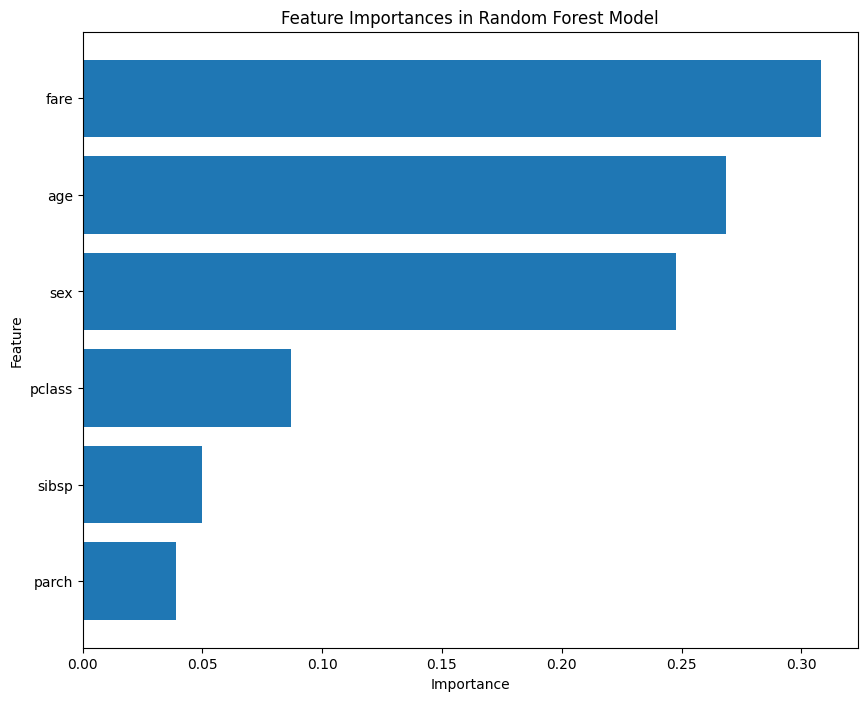

#9. 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=31),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# 테스트 데이터를 가지고 predict(예측)한다.
predictions_grid = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_grid) #실제값과 예측값을 비교해줘
print(f"Accuracy: {accuracy}") # 두 데이터가 얼마나 일치하는지 점검

Accuracy: 0.7786259541984732
